# Author: Tanay Yadav
# Roll No: AI20BTECH11026
# Assignment 5

In [275]:
import torch as th
import torchvision as tv
import torchvision.datasets as dataset
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.manifold import TSNE

In [247]:
# checking if the neural net can be run on the GPU

device = "cuda" if th.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# Working with the Datasets

In [248]:
# importing the images from the MNIST dataset

transform = tv.transforms.Compose([tv.transforms.Resize((28)), tv.transforms.ToTensor()])
mnist_train = dataset.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = dataset.MNIST(root='./data', train=False, download=True, transform=transform)

In [249]:
train_loader = th.utils.data.DataLoader(dataset=mnist_train, batch_size=1120)
test_loader = th.utils.data.DataLoader(dataset=mnist_test, batch_size=190)

In [250]:
images = iter(train_loader)
image_data, image_label = images.next()
images_test = iter(test_loader)
test_image_data, test_image_label = images_test.next()

image_data.shape

torch.Size([1120, 1, 28, 28])

In [251]:
# creating the training dataset

images_0 = []
images_1 = []
images_2 = []
images_3 = []
images_4 = []
images_5 = []
images_6 = []
images_7 = []
images_8 = []
images_9 = []

for n in range(1120):
    if image_label[n] == 0 and len(images_0)<100:
        images_0.append(((image_data[n][0]), 0))
    if image_label[n] == 1 and len(images_1)<100:
        images_1.append(((image_data[n][0]), 1))
    if image_label[n] == 2 and len(images_2)<100:
        images_2.append(((image_data[n][0]), 2))
    if image_label[n] == 3 and len(images_3)<100:
        images_3.append(((image_data[n][0]), 3))
    if image_label[n] == 4 and len(images_4)<100:
        images_4.append(((image_data[n][0]), 4))
    if image_label[n] == 5 and len(images_5)<100:
        images_5.append(((image_data[n][0]), 5))
    if image_label[n] == 6 and len(images_6)<100:
        images_6.append(((image_data[n][0]), 6))
    if image_label[n] == 7 and len(images_7)<100:
        images_7.append(((image_data[n][0]), 7))
    if image_label[n] == 8 and len(images_8)<100:
        images_8.append(((image_data[n][0]), 8))
    if image_label[n] == 9 and len(images_9)<100:
        images_9.append(((image_data[n][0]), 9))

images_train = images_0 + images_1 + images_2 + images_3 + images_4 + images_5 + images_6 + images_7 + images_8 + images_9
images_train = np.array(images_train, dtype=object)
np.random.shuffle(images_train)
for i in range(len(images_train)):
    images_train[i, 0] = images_train[i, 0].reshape((1, 1, 28, 28))

In [252]:
# creating the testing dataset

images_0 = []
images_1 = []
images_2 = []
images_3 = []
images_4 = []
images_5 = []
images_6 = []
images_7 = []
images_8 = []
images_9 = []

for n in range(190):
    if test_image_label[n] == 0 and len(images_0)<10:
        images_0.append((test_image_data[n][0], 0))
    if test_image_label[n] == 1 and len(images_1)<10:
        images_1.append((test_image_data[n][0], 1))
    if test_image_label[n] == 2 and len(images_2)<10:
        images_2.append((test_image_data[n][0], 2))
    if test_image_label[n] == 3 and len(images_3)<10:
        images_3.append((test_image_data[n][0], 3))
    if test_image_label[n] == 4 and len(images_4)<10:
        images_4.append((test_image_data[n][0], 4))
    if test_image_label[n] == 5 and len(images_5)<10:
        images_5.append((test_image_data[n][0], 5))
    if test_image_label[n] == 6 and len(images_6)<10:
        images_6.append((test_image_data[n][0], 6))
    if test_image_label[n] == 7 and len(images_7)<10:
        images_7.append((test_image_data[n][0], 7))
    if test_image_label[n] == 8 and len(images_8)<10:
        images_8.append((test_image_data[n][0], 8))
    if test_image_label[n] == 9 and len(images_9)<10:
        images_9.append((test_image_data[n][0], 9))

images_test = images_0 + images_1 + images_2 + images_3 + images_4 + images_5 + images_6 + images_7 + images_8 + images_9
images_test = np.array(images_test, dtype=object)
np.random.shuffle(images_test)

for i in range(len(images_test)):
    images_test[i, 0] = images_test[i, 0].reshape((1, 1, 28, 28))

# Creating the Convolutional Neural Network

In [347]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # First 2D convolutional layer, taking in 1 input channel (image),
        # outputting 4 convolutional features, with a square kernel size of 5
        self.conv1 = nn.Conv2d(1, 4, 5, 1, 0)
        # First 2d pooling layer. Takes Input activation maps from the previous 
        # convolution layer.
        self.pool1 = nn.MaxPool2d(2, 2)
        # Second 2D convolutional layer, taking in the 4 input layers,
        # outputting 4 convolutional features, with a square kernel size of 5
        self.conv2 = nn.Conv2d(4, 4, 5, 1, 0)
        # Second 2d pooling layer. Takes Input activation maps from the previous 
        # convolution layer.
        self.pool2 = nn.MaxPool2d(2, 2)
        # Fully connected layer 1
        self.fc1 = nn.Linear(64, 49)
        # dropout after the hidden layer
        self.dropout = nn.Dropout(0.5)
        # batchnorm after the hidden layer
        self.batchnorm = nn.BatchNorm1d(49)
        # Fully connected layer 2
        self.fc2 = nn.Linear(49, 10)

    def forward(self, x, batchnorm, dropout):
        # feedforward path
        batchnorm=False
        conv1_out = F.relu(self.conv1(x))           # convolution layer 1
        # print(conv1_out.shape)
        pool1_out = self.pool1(conv1_out)           # Max Pooling layer 1
        # print(pool1_out.shape)
        conv2_out = F.relu(self.conv2(pool1_out))   # convolution layer 2
        # print(conv2_out.shape)
        pool2_out = self.pool2(conv2_out)           # Max Pooling layer 2
        # print(pool2_out.shape)
        flat_out = th.flatten(pool2_out, 1)         # flattening layer
        h_out = self.fc1(flat_out)
        # if batchnorm has to be applied
        if batchnorm:
            h_out = self.batchnorm(h_out)
             
        h_out = F.relu(h_out.reshape((1, 49)))                       # hidden layer output
        # if dropout has to be applied
        if dropout:
            h_out = self.dropout(h_out)
        f_out = self.fc2(h_out)                     # final output

        return f_out, flat_out
my_nn = Net()   
print(my_nn)

Net(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 4, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=49, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (batchnorm): BatchNorm1d(49, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=49, out_features=10, bias=True)
)


# Train function

In [397]:
def train(train_data, test_data, batch_size, epochs, variant='rmsprop', batchnorm=False, dropout=False, tsne=False):

    if variant not in ['vanilla', 'momentum', 'rmsprop']:
        raise ValueError('This variant does not exist.')
    
    criterion = nn.CrossEntropyLoss()
    
    # optimisers according to the variant of SGD
    if variant == 'vanilla':
        optimiser = optim.SGD(my_nn.parameters(), lr=0.001)
    if variant == 'momentum':
        optimiser = optim.SGD(my_nn.parameters(), lr=0.001, momentum=0.9)
    if variant == 'rmsprop':
        optimiser = optim.RMSprop(my_nn.parameters(), lr=0.001, alpha=0.9)
    
    p_train_loss = []
    p_test_loss = []
    bottlenecks = []
    for e in range(epochs):
        print('Epoch:', e+1, '/', epochs)
        optimiser.zero_grad()                   # setting the accumulated gradient weights to 0
        np.random.shuffle(train_data)           # shuffling the train data
        l_train = 0
        l_test = 0
        accu = 0
        for i in range(train_data.shape[0]):
            
            output, _ = my_nn.forward(train_data[i, 0], batchnorm, dropout)
            target = th.tensor([float(1) if idx == train_data[i][1] else float(0) for idx in range(10)]).reshape((1, 10))
            loss = criterion(output, target)

            # calculating the training accuracy
            label_train = output.detach()
            label_train = np.array(label_train)
            if np.argmax(label_train) == train_data[i, 1]:
                accu += 1  
            
            l_train += loss.item()
            if (i+1)%batch_size == 0:
                # updating the weights by backpropagation in mini batches
                loss.backward()
                optimiser.step()
                optimiser.zero_grad()
            
        print('Train Loss:', l_train/train_data.shape[0])
        print('Train Accuracy:', accu/train_data.shape[0]*100, '%')
        p_train_loss.append(l_train/train_data.shape[0])
        accu = 0
        
        # storing the bottleneck features in a list to later apply t-SNE
        
        count = 0
        for j in range(test_data.shape[0]):
            
            # condition to get the bottleneck features
            if e == 0 or e == epochs - 1:
                count += 1
                output_test, bottleneck = my_nn.forward(test_data[j, 0], batchnorm, dropout)
                bottleneck = np.array(bottleneck.detach())                  # removing the gradient from the bottleneck features
                bottlenecks.append(bottleneck)
            else:
                output_test, _ = my_nn.forward(test_data[j, 0], batchnorm, dropout)
            
            
            target_test = th.tensor([float(1) if idx == test_data[j, 1] else float(0) for idx in range(10)]).reshape((1, 10))
            loss = criterion(output_test, target_test)
            l_test += loss.item()

            # calculating the accuracy
            label = output_test.detach()
            label = np.array(label)
            if np.argmax(label) == test_data[j, 1]:
                accu += 1  
        
        # printing the test loss and accuracy
        print('Test Loss:', l_test/test_data.shape[0])
        p_test_loss.append(l_test/test_data.shape[0])
        print('Test Accuracy:', (accu/test_data.shape[0])*100, '%')

    # plotting the graphs
    nums = np.arange(1, epochs+1)
    plt.title('Error vs Epoch Curve')
    plt.plot(nums, p_train_loss, label='Train Loss')
    plt.plot(nums, p_test_loss, label='Test Loss')
    plt.ylabel('$Error$')
    plt.xlabel('$Epochs$')
    plt.legend()
    plt.grid(True)
    plt.show()

    # applying tsne to the bottleneck layer
    if tsne:
        print('T-SNE Plots after the first epoch')
        plt.figure(figsize=(15, 15))
        for i in range(100):
            
            initial_fit = TSNE(n_components = 2, n_iter=2500, perplexity=10).fit_transform(bottlenecks[2*i].reshape((64, 1)))
            plt.subplot(10, 10, i+1)
            plt.plot(initial_fit[:, 0], initial_fit[:, 1], 'r.')
            plt.xticks([])
            plt.yticks([])
            plt.grid(True)
            plt.plot()
        plt.show()
        print('T-SNE Plots after the last epoch')
        plt.figure(figsize=(15, 15))
        for i in range(100):
    
            final_fit = TSNE(n_components = 2, n_iter=2500, perplexity=10).fit_transform(bottlenecks[2*i + 1].reshape((64, 1)))
            plt.subplot(10, 10, i+1)
            plt.plot(final_fit[:, 0], final_fit[:, 1], 'r.')
            plt.xticks([])
            plt.yticks([])
            plt.grid(True)
            plt.plot()
        plt.show()

# Training the different variants

Epoch: 1 / 15
Train Loss: 0.2993158271233555
Train Accuracy: 92.10000000000001 %
Test Loss: 0.2876346773901014
Test Accuracy: 93.0 %
Epoch: 2 / 15
Train Loss: 0.3001489513521132
Train Accuracy: 91.60000000000001 %
Test Loss: 0.3135760549222141
Test Accuracy: 93.0 %
Epoch: 3 / 15
Train Loss: 0.3051535238119911
Train Accuracy: 90.9 %
Test Loss: 0.33234446348436
Test Accuracy: 91.0 %
Epoch: 4 / 15
Train Loss: 0.2992468878431428
Train Accuracy: 91.3 %
Test Loss: 0.29605817611330165
Test Accuracy: 89.0 %
Epoch: 5 / 15
Train Loss: 0.29694806909176963
Train Accuracy: 92.10000000000001 %
Test Loss: 0.34289729207655
Test Accuracy: 91.0 %
Epoch: 6 / 15
Train Loss: 0.2974594006291905
Train Accuracy: 91.9 %
Test Loss: 0.3215128579307202
Test Accuracy: 92.0 %
Epoch: 7 / 15
Train Loss: 0.32016742267037546
Train Accuracy: 89.8 %
Test Loss: 0.350676081704737
Test Accuracy: 90.0 %
Epoch: 8 / 15
Train Loss: 0.31003925700682644
Train Accuracy: 91.2 %
Test Loss: 0.3321937277030145
Test Accuracy: 93.0 %
Ep

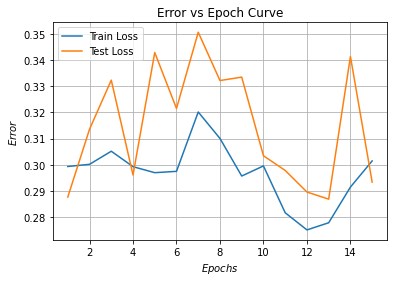

T-SNE Plots after the first epoch


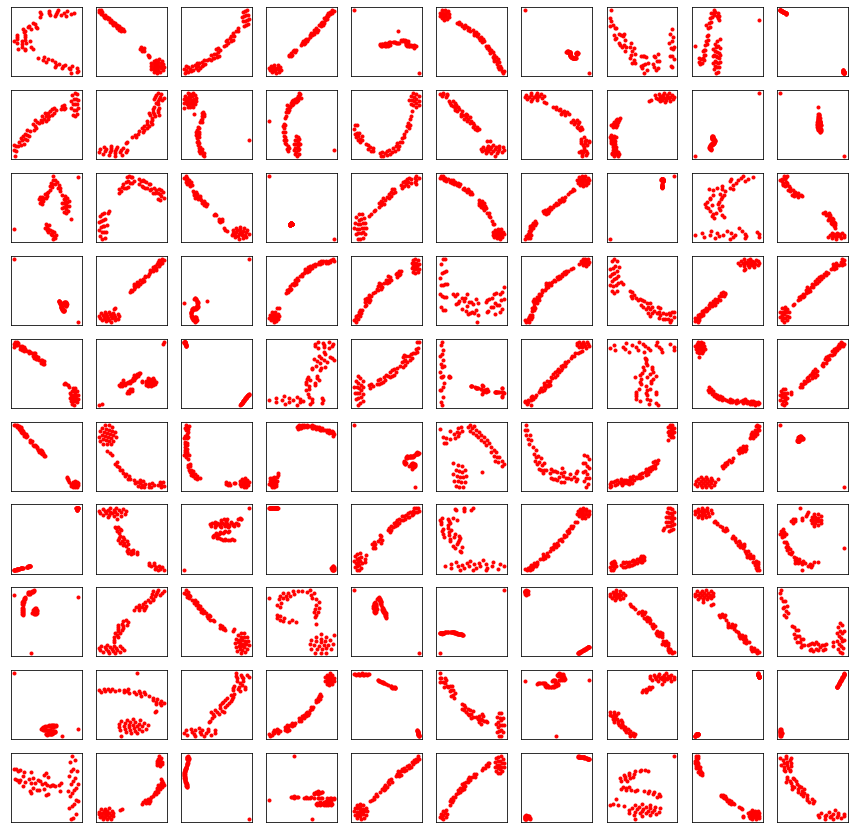

T-SNE Plots after the last epoch


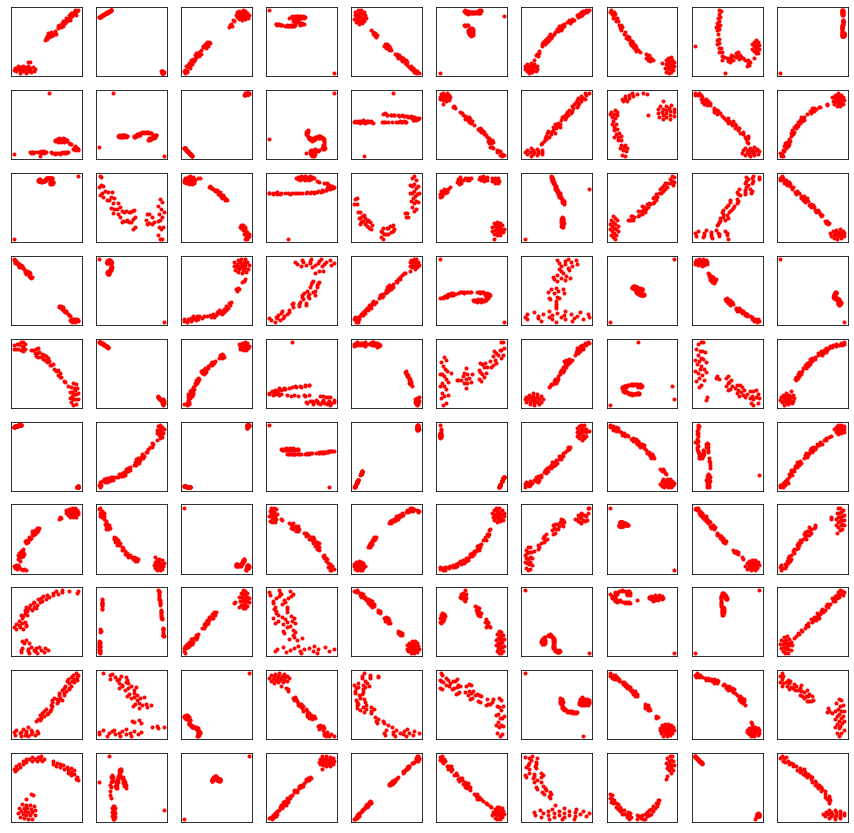

In [413]:
train(images_train, images_test, 40, 15, 'vanilla', tsne=True)

Epoch: 1 / 15
Train Loss: 1.0896200555869937
Train Accuracy: 75.4 %
Test Loss: 1.0397868632179688
Test Accuracy: 74.0 %
Epoch: 2 / 15
Train Loss: 1.370412743570957
Train Accuracy: 61.0 %
Test Loss: 1.3879279514285736
Test Accuracy: 56.99999999999999 %
Epoch: 3 / 15
Train Loss: 1.2538781803105958
Train Accuracy: 60.4 %
Test Loss: 1.091116411462426
Test Accuracy: 68.0 %
Epoch: 4 / 15
Train Loss: 0.8243803554638289
Train Accuracy: 74.3 %
Test Loss: 0.7137873951857909
Test Accuracy: 82.0 %
Epoch: 5 / 15
Train Loss: 0.5623390096639778
Train Accuracy: 80.2 %
Test Loss: 0.6512521250083227
Test Accuracy: 80.0 %
Epoch: 6 / 15
Train Loss: 0.6134761467293011
Train Accuracy: 77.9 %
Test Loss: 0.5103087598251296
Test Accuracy: 86.0 %
Epoch: 7 / 15
Train Loss: 0.4734254771386768
Train Accuracy: 84.8 %
Test Loss: 0.42093658621837676
Test Accuracy: 89.0 %
Epoch: 8 / 15
Train Loss: 0.37831423559673155
Train Accuracy: 88.3 %
Test Loss: 0.31033771059941495
Test Accuracy: 89.0 %
Epoch: 9 / 15
Train Loss: 

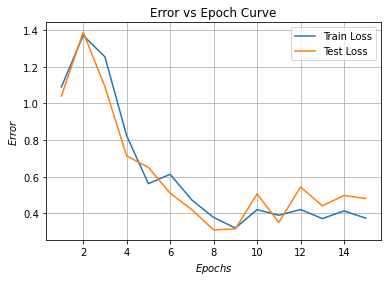

T-SNE Plots after the first epoch


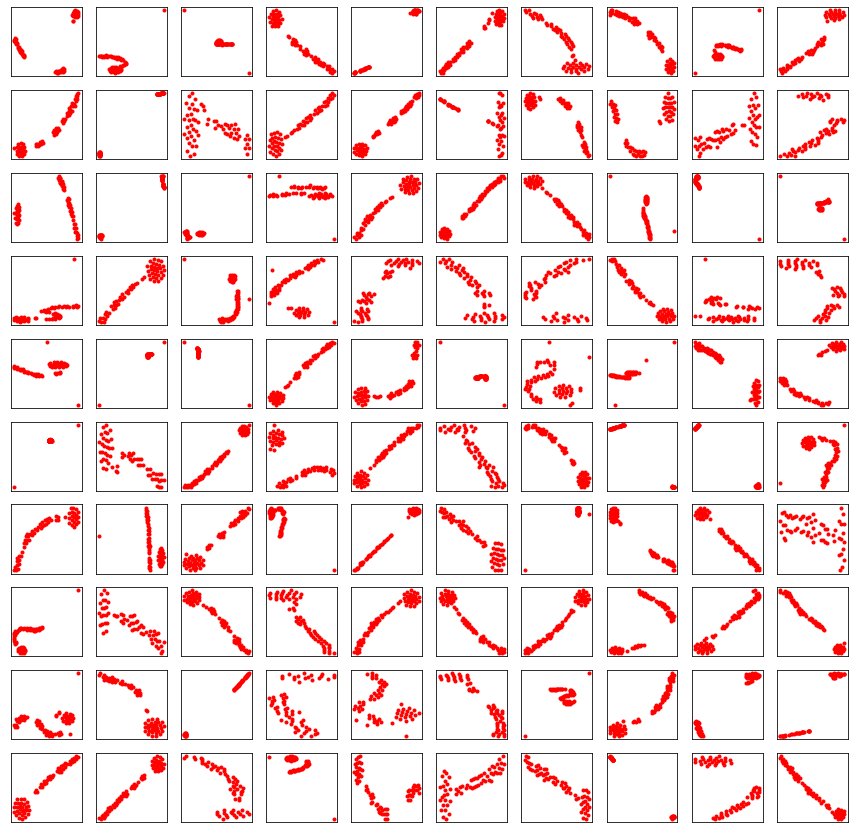

T-SNE Plots after the last epoch


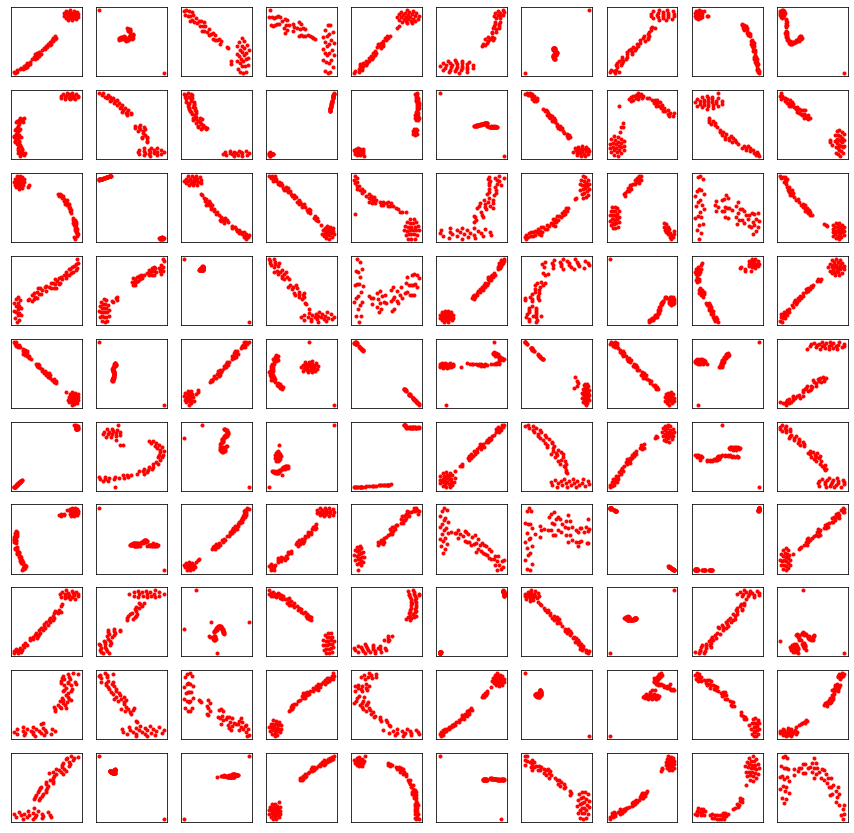

In [414]:
train(images_train, images_test, 40, 15, 'momentum', tsne=True)

Epoch: 1 / 15
Train Loss: 0.33602030125365157
Train Accuracy: 89.1 %
Test Loss: 0.35839649137211377
Test Accuracy: 91.0 %
Epoch: 2 / 15
Train Loss: 0.3265615459084228
Train Accuracy: 89.9 %
Test Loss: 0.39860353197520454
Test Accuracy: 90.0 %
Epoch: 3 / 15
Train Loss: 0.31545767242379386
Train Accuracy: 90.0 %
Test Loss: 0.3457634430809412
Test Accuracy: 91.0 %
Epoch: 4 / 15
Train Loss: 0.30756433600839383
Train Accuracy: 90.2 %
Test Loss: 0.29499670636250813
Test Accuracy: 91.0 %
Epoch: 5 / 15
Train Loss: 0.30673834721604626
Train Accuracy: 90.10000000000001 %
Test Loss: 0.32039774718457914
Test Accuracy: 90.0 %
Epoch: 6 / 15
Train Loss: 0.2917992094208513
Train Accuracy: 90.4 %
Test Loss: 0.295367996932182
Test Accuracy: 91.0 %
Epoch: 7 / 15
Train Loss: 0.2653900783895714
Train Accuracy: 91.60000000000001 %
Test Loss: 0.3227562382736505
Test Accuracy: 90.0 %
Epoch: 8 / 15
Train Loss: 0.28481942291398854
Train Accuracy: 92.2 %
Test Loss: 0.290506302073336
Test Accuracy: 93.0 %
Epoch: 

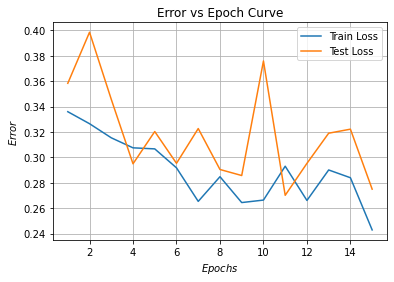

T-SNE Plots after the first epoch


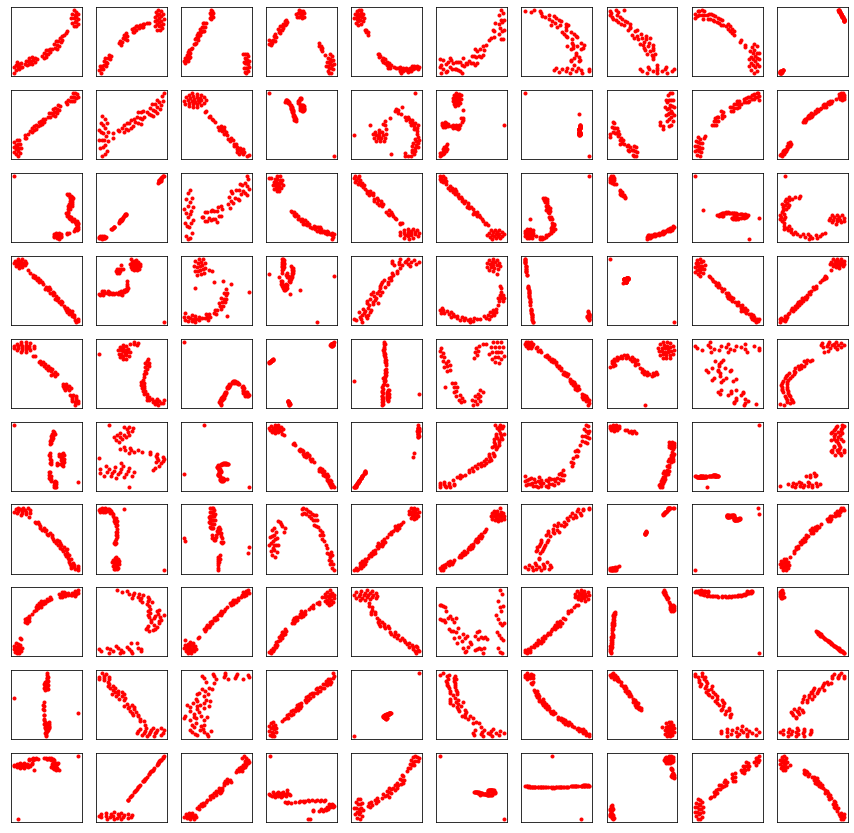

T-SNE Plots after the last epoch


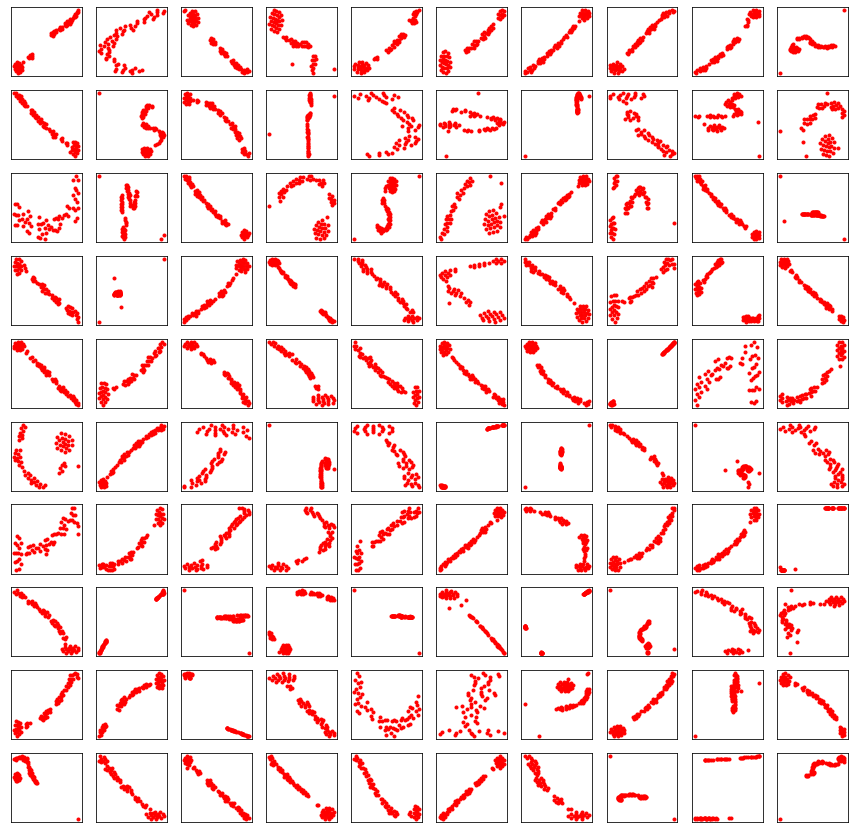

In [415]:
train(images_train, images_test, 40, 15, 'rmsprop', tsne=True)

# Visulaizing some of the activation maps

In [416]:
params = list(my_nn.parameters())
for i in range(len(params)):
    print(params[i].shape)

torch.Size([4, 1, 5, 5])
torch.Size([4])
torch.Size([4, 4, 5, 5])
torch.Size([4])
torch.Size([49, 64])
torch.Size([49])
torch.Size([49])
torch.Size([49])
torch.Size([10, 49])
torch.Size([10])


param[0] is the filter kernel for the convolution layer 1,    
param[1] is the filter for max pooling layer 1,   
param[2] is the filter kernel for the convolution layer 2,    
param[3] is the filter for max pooling layer 2,    
param[4] is weights between the input layer and the hidden layer     
param[6] is weights between the hidden layer and the outputs     
param[5, 7] are the outputs of the Fully connected layers with ReLU    

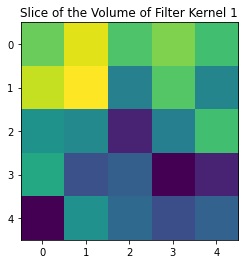

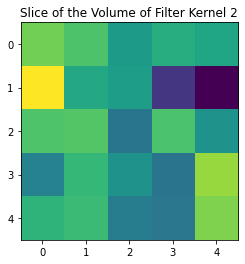

In [417]:
# visualizing some filter kernels

kernel1 = params[0].detach()
plt.title('Slice of the Volume of Filter Kernel 1')
plt.imshow(kernel1[0, 0, :, :])
plt.show()
kernel2 = params[2].detach()
plt.title('Slice of the Volume of Filter Kernel 2')
plt.imshow(kernel2[0, 0, :, :])
plt.show()

# Comparing with HW4

On comparing the accuracies with the HW 4, the model with pytorch performs really good, giving 90% accuracy while the cnn written in HW 4 gave only 10% accuracy.

# Batch Norm with Dropout = 0.2

Epoch: 1 / 15
Train Loss: 1.1396921655907692
Train Accuracy: 69.8 %
Test Loss: 1.053531678418185
Test Accuracy: 70.0 %
Epoch: 2 / 15
Train Loss: 0.9739909653595328
Train Accuracy: 72.1 %
Test Loss: 1.232484580359578
Test Accuracy: 61.0 %
Epoch: 3 / 15
Train Loss: 0.8660781964696189
Train Accuracy: 73.5 %
Test Loss: 0.9460631413788713
Test Accuracy: 68.0 %
Epoch: 4 / 15
Train Loss: 0.8792732470647561
Train Accuracy: 74.8 %
Test Loss: 0.8342084454767644
Test Accuracy: 73.0 %
Epoch: 5 / 15
Train Loss: 0.8866110013181226
Train Accuracy: 72.2 %
Test Loss: 0.8871675243670961
Test Accuracy: 73.0 %
Epoch: 6 / 15
Train Loss: 0.8847459185608845
Train Accuracy: 73.3 %
Test Loss: 0.8168463091824105
Test Accuracy: 71.0 %
Epoch: 7 / 15
Train Loss: 0.8120946260528226
Train Accuracy: 75.1 %
Test Loss: 0.925811173353918
Test Accuracy: 69.0 %
Epoch: 8 / 15
Train Loss: 0.7801037309943448
Train Accuracy: 76.1 %
Test Loss: 0.7280476492512207
Test Accuracy: 76.0 %
Epoch: 9 / 15
Train Loss: 0.738148668220616

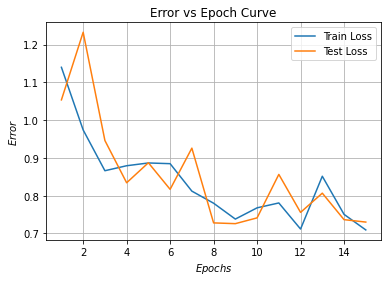

T-SNE Plots after the first epoch


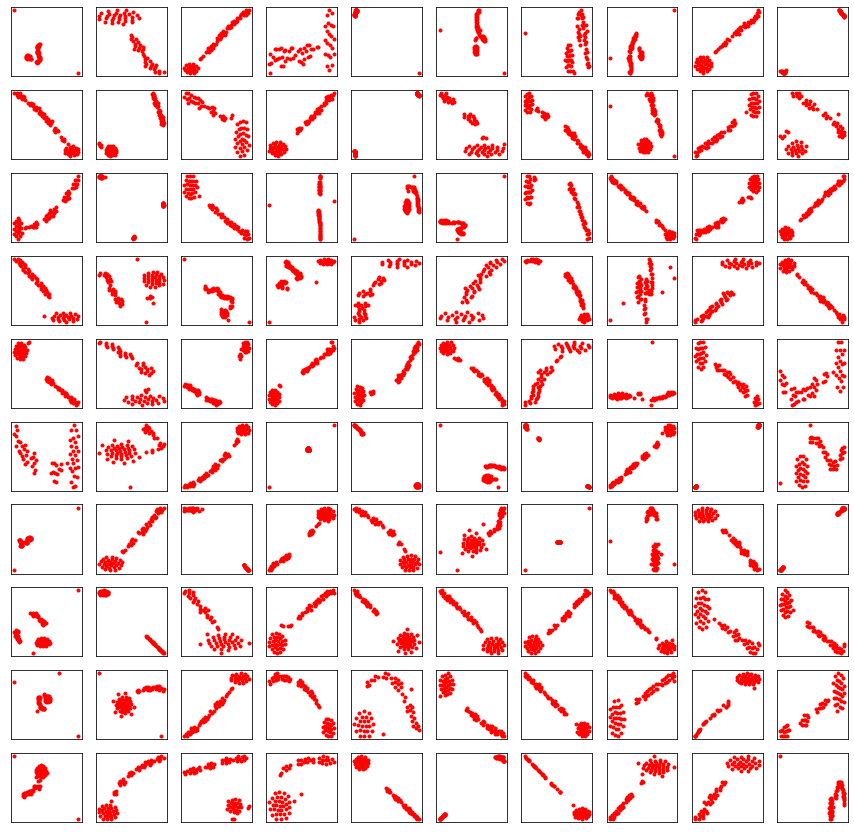

T-SNE Plots after the last epoch


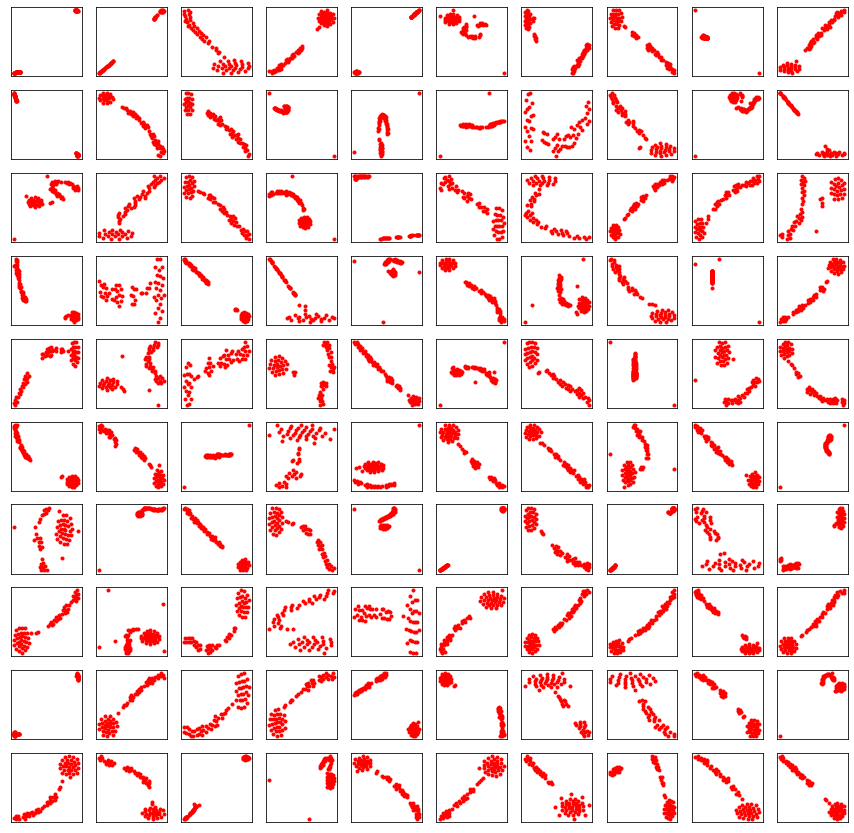

In [418]:
train(images_train, images_test, 40, 15, 'rmsprop', batchnorm=True, dropout=True, tsne=True)